# Naive Bayes Classifie

**朴素贝叶斯 Naive Bayes**是常用于自然语言分类问题的算法。**它在垃圾邮件过滤上的应用非
常有名**

朴素贝叶斯是一个基于概率进行预测的算法，在实践中被用于分类问题。

具体来说，就是计算数据为某个标签的概率，并将其分类为概率值最大的标签。

## Bayes' Theorem Formula: 

Naive Bayes is a probabilistic classifier (概率分类器) based on Bayes' Theorem (贝叶斯定理). 

> $$
> P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
> $$
> 
> - $ P(A|B) $ : Probability of A given B → **Posterior probability** (后验概率)
> - $ P(B|A) $ : Probability of B given A → **Likelihood** (似然)
> - $ P(A) $ : Probability of A → **Prior probability** (先验概率)
> - $ P(B) $ : Probability of B → **Evidence** (证据)

-------


朴素贝叶斯分类器是与上一节介绍的线性模型非常相似的一种分类器，但它的训练速度往
往更快。这种高效率所付出的代价是，朴素贝叶斯模型的泛化能力要比线性分类器（如
LogisticRegression和LinearSVC）稍差。

**朴素贝叶斯 = 用概率做分类 + 忽略特征之间的关系 + 极其高效**  
它不是最准的，但往往是最快、最简单的选择！


## 为什么叫“朴素”？

因为它的核心假设是：

> **所有特征彼此独立**，即某个特征出现与否不影响其他特征。

比如判断一封邮件是不是垃圾邮件：

- 它认为：“出现‘免费’和‘中奖’这两个词是独立事件”
- 实际上它们可能相关，但模型忽略这一点 → 这就是“朴素”

尽管如此，这个假设让计算变得**极其简单快速**，所以它在很多场景下表现非常好！



## 分类


| 模型 | 学习什么？ | 举个例子 |
|------|------------|----------|
| `BernoulliNB` | 每个类别的每个特征中，**1 的个数** | 文本中某个词是否出现 |
| `MultinomialNB` | 每个类别的每个特征的**平均值** | 文本中某个词出现的**次数** |
| `GaussianNB` | 每个类别的每个特征的**均值和标准差** | 身高、体重等连续变量 |

> 💡 文中提到的 `BernoulliNB` 和 `MultinomialNB` 主要用于**文本分类**，比如垃圾邮件识别、情感分析等。


## BernoulliNB分类器

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
X = np.array([[0, 1, 0, 1], 
              [1, 0, 1, 1], 
              [0, 0, 0, 1], 
              [1, 0, 1, 0]]) 
y = np.array([0, 1, 0, 1])


这里我们有4个数据点，每个点有4个二分类特征。一共有两个类别：0和1。对于类别0
（第1、3个数据点），第一个特征有2个为零、0个不为零，第二个特征有1个为零、1个
不为零，以此类推。然后对类别1中的数据点计算相同的计数。计算每个类别中的非零元
素个数，大体上看起来像这样

In [28]:
counts = {} 
for label in np.unique(y): 
    # 对每个类别进行遍历 
    # 计算（求和）每个特征中1的个数 
    counts[label] = X[y == label].sum(axis=0) 
print("Feature counts:\n{}".format(counts))

Feature counts:
{np.int64(0): array([0, 1, 0, 2]), np.int64(1): array([2, 0, 2, 1])}


解释一下：

类别1（也就是第一行和第三行），是特征0

返回的[0,1,0,2] 就是两行相加的结果，同时也是“类别0中每个特征的1的个数”

所以特征0中有 0 个1，特征1中有 1 个1，特征2中有 0 个1，特征3中有 2 个1

就是这个意思，很聪明吧


# Spam Classification
1. **Prepare data**: Collect emails labeled as spam or ham.
2. **Preprocess text**: Clean and tokenize the text (分词).
3. **Train model**: Use Naive Bayes to learn from training data.
4. **Test model**: Predict new emails.
5. **Evaluate**: Check accuracy.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# Create a simple dataset
data = {
    'email': [
        'Free money now!',                     # spam
        'Win cash fast!',                      # spam
        'Call you later, meeting at 5?',       # ham
        'Congrats! You won $1000!',            # spam
        'Can we schedule a call?',             # ham
        'URGENT: Claim your prize!',           # spam
        'Thanks for the document.',            # ham
        'Make money fast with no effort.'      # spam
    ],
    'label': ['spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam']
}

df = pd.DataFrame(data)
print(df)

                             email label
0                  Free money now!  spam
1                   Win cash fast!  spam
2    Call you later, meeting at 5?   ham
3         Congrats! You won $1000!  spam
4          Can we schedule a call?   ham
5        URGENT: Claim your prize!  spam
6         Thanks for the document.   ham
7  Make money fast with no effort.  spam


 **Step 4: Preprocess Text**

We convert text into numbers using Bag-of-Words (词袋模型):

Each email becomes a vector showing how many times each word appears.

In [31]:
# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit and transform the emails into feature vectors
X = vectorizer.fit_transform(df['email'])

# Labels (target)
y = df['label']

 **Step 5: Split Data**

Split into training and testing sets (80% train, 20% test):

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**stratify=y** ensures both classes (spam/ham) are evenly split. 

**Step 6: Train the Model**
    
Use Multinomial Naive Bayes:

In [33]:
# Create and train the classifier
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


**Step 7: Make Predictions**

In [34]:
# Predict on test set
y_pred = model.predict(X_test)

# Show results
print("Predicted labels:", y_pred)
print("Actual labels:   ", y_test.values)

Predicted labels: ['spam' 'spam']
Actual labels:    ['spam' 'ham']


**Step 8: Evaluate Performance**

In [35]:
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

         ham       0.00      0.00      0.00         1
        spam       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



D:\Software\VR_ev\hands-on\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Software\VR_ev\hands-on\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Software\VR_ev\hands-on\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


**Try a New Email!** 

Let’s predict a brand-new email:

Spam = junk mail; Ham = normal email

In [36]:
new_email = ["Congratulations! You've won a free iPhone!"]

# Must use the same vectorizer (trained on original vocabulary)
new_email_vec = vectorizer.transform(new_email)

# Predict
prediction = model.predict(new_email_vec)
probability = model.predict_proba(new_email_vec)

print("Prediction:", prediction[0])
print("Probability [ham, spam]:", probability[0])

Prediction: spam
Probability [ham, spam]: [0.15334543 0.84665457]


# SMS
let's try a real one.

https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data

## Step 1: Import Libraries and Load the Data

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import re
from nltk.corpus import stopwords

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\22483\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## What Are "Stopwords"? (停用词)

These are very common words in English that usually don’t carry much meaning in text classification. Examples:

- `the`, `a`, `an`, `and`, `or`, `but`, `in`, `on`, `at`, `for`, `to`, `of`, `is`, `are`

In spam detection:

- We often remove them because they appear in both spam and ham.
- Removing them helps focus on **important words**, like:
	- `free`, `win`, `prize`, `click`, `urgent` → more likely to be spam

In [69]:
# Load dataset, specify encoding because of special characters
df = pd.read_csv('spam.csv', encoding='latin-1')

# Look at first 5 rows
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


## Step2： Clean the Dataset
Also, there are extra unnamed columns. Let's clean it.

In [70]:
# Fix broken column names
df.columns = ['label', 'message', 'unknown1', 'unknown2', 'unknown3']

# Keep only the first two columns
df = df[['label', 'message']]

# ⚠️ CRITICAL STEP: Remove any rows where message is NaN or empty
df.dropna(subset=['message'], inplace=True)  # Remove missing messages
df = df.reset_index(drop=True)               # Reset index

We have 4825 normal messages and 747 spam.

## Step 3 : **Text Preprocessing (Clean the Messages)**

We remove punctuation, lowercase text, remove stop words like "the", "and".

In [84]:
# Step 5: Preprocess text
def preprocess_text(text):
    text = text.lower()
    # Only remove non-letters, but keep $ and !
    text = re.sub(r'[^a-zA-Z\s\$!]', '', text)
    return text.strip()

# Apply preprocessing to all messages
df['clean_message'] = df['message'].apply(preprocess_text)

# Show original vs cleaned
print("\nOriginal vs Cleaned:")
print(df[['message', 'clean_message']].head())


Original vs Cleaned:
                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in  a wkly comp to win fa cup final...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes to usf he lives aroun...  


## Step 4:Vectorization — Convert Text to Numbers
We use CountVectorizer or TfidfVectorizer.

Let’s try TfidfVectorizer — it gives lower weight to common words like “free” if they appear everywhere.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_features=5000,
    stop_words=None,       # ← Let’s NOT remove stopwords automatically
    ngram_range=(1, 2)     # ← Add bigrams like "won money", "click here"
)
X = vectorizer.fit_transform(df['clean_message'])

# Labels (target): spam or ham
y = df['label']

## Step 5: Split into Training and Testing Sets

In [90]:
# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples: ", X_test.shape[0])

Training samples: 4457
Testing samples:  1115


## Step 6: Train Navie Bayes Model


In [91]:
# Create and train the classifier
model = MultinomialNB()
model.fit(X_train, y_train)

print("Model trained successfully! 🎉")

Model trained successfully! 🎉


## Step 7: Make Predictions and Evaluate the Model

In [92]:
# Predict on test set
y_pred = model.predict(X_test)

# Predict probabilities (optional)
y_prob = model.predict_proba(X_test)  # [P(ham), P(spam)]

In [93]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9785

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       966
        spam       0.95      0.89      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
[[959   7]
 [ 17 132]]


## Visualize it !

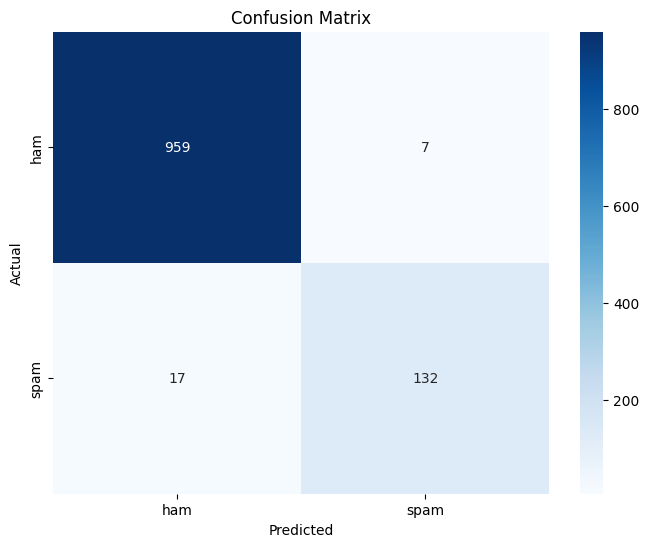

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Test on new message

In [97]:
new_msg = ["Congratulations! You've won $1000! Click here now!"]

# Must clean and vectorize the same way!
clean_new = preprocess_text(new_msg[0])
vec_new = vectorizer.transform([clean_new])

pred = model.predict(vec_new)
prob = model.predict_proba(vec_new)

print("Message:", new_msg[0])
print("Prediction:", pred[0])
print("Spam probability: {:.2f}%".format(prob[0][1] * 100))

Message: Congratulations! You've won $1000! Click here now!
Prediction: spam
Spam probability: 99.90%
